In [ ]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 9.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is in

In [ ]:
#---------------------------------IMPORT LIBRARIES------------------------------------

from datasets import load_dataset
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

from sklearn.metrics import classification_report

import random
from collections import defaultdict

In [ ]:
#------------LOAD DATASET AND SPLIT TRAIN/TEST-----------------------------------------

ds = load_dataset("uoft-cs/cifar100")# Load the CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0 #Normalize pixel values to be between 0 and 1

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.98k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/119M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/23.8M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
#--------------DEFINE THE CNN MODEL ARCHITECTURE-----------------------------------------------------

model = models.Sequential() #A Simple basic sequential model
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))  # Convolutional Layer by filtering 3x3 matrix - 32 kernel size; Input shape for CIFAR10= 32x 32 with RGB (3)-Color
model.add(layers.MaxPooling2D((2, 2))) #Max pooling 2x2
model.add(layers.Conv2D(64, (3, 3), activation='relu')) #Activation Function - relu for non-linearlity
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())  # Flatten the 3D feature maps
model.add(layers.Dense(64, activation='relu')) #64 kernels
model.add(layers.Dense(10, activation='softmax'))  # 10 classes for CIFAR10

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#-----------------COMPILE MODEL---------------------------------------------------------------

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])  #define loss function ,  metrices and optimization
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 45ms/step - accuracy: 0.3447 - loss: 1.7596 - val_accuracy: 0.5348 - val_loss: 1.2841
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.5874 - loss: 1.1708 - val_accuracy: 0.6266 - val_loss: 1.0591
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.6388 - loss: 1.0299 - val_accuracy: 0.6474 - val_loss: 1.0267
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 44ms/step - accuracy: 0.6769 - loss: 0.9200 - val_accuracy: 0.6651 - val_loss: 0.9406
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 45ms/step - accuracy: 0.7050 - loss: 0.8379 - val_accuracy: 0.6722 - val_loss: 0.9491
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.7282 - loss: 0.7747 - val_accuracy: 0.6931 - val_loss: 0.8744
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 46ms/step - accuracy: 0.7506 - loss: 0.7109 - val_accuracy: 0.6951 - val_loss: 0.8699
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.7701 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


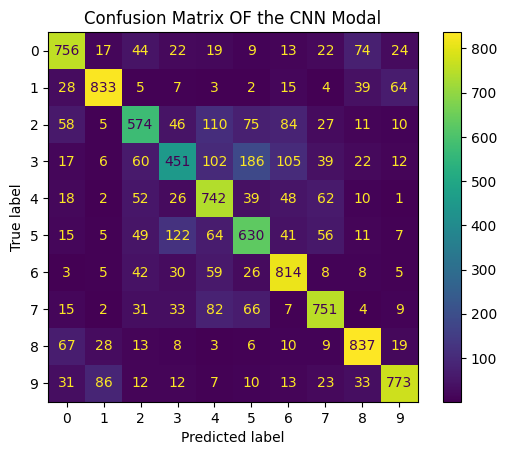

In [ ]:
#-----------------CONFUSION MAATRIX--------------------------

y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_labels.flatten()
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix OF the CNN Modal")
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


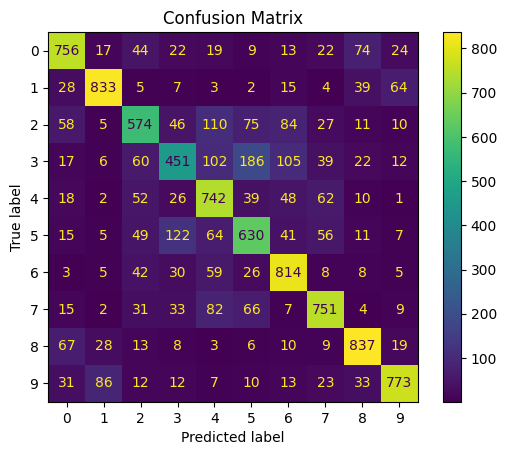

              precision    recall  f1-score   support

           0       0.75      0.76      0.75      1000
           1       0.84      0.83      0.84      1000
           2       0.65      0.57      0.61      1000
           3       0.60      0.45      0.51      1000
           4       0.62      0.74      0.68      1000
           5       0.60      0.63      0.61      1000
           6       0.71      0.81      0.76      1000
           7       0.75      0.75      0.75      1000
           8       0.80      0.84      0.82      1000
           9       0.84      0.77      0.80      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.71     10000
weighted avg       0.72      0.72      0.71     10000



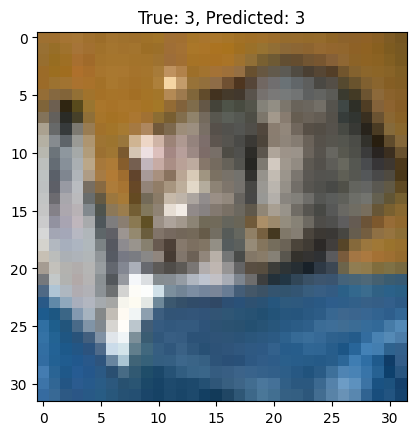

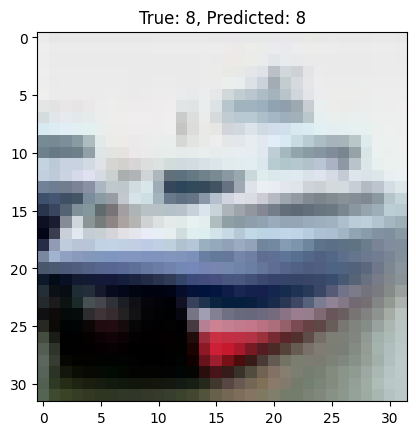

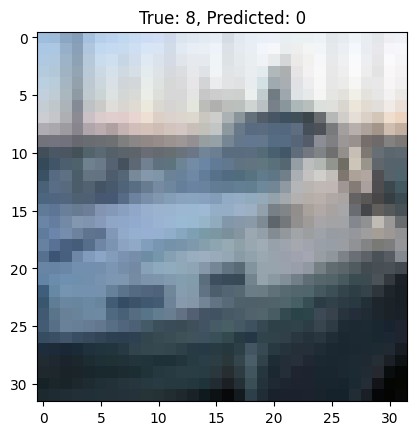

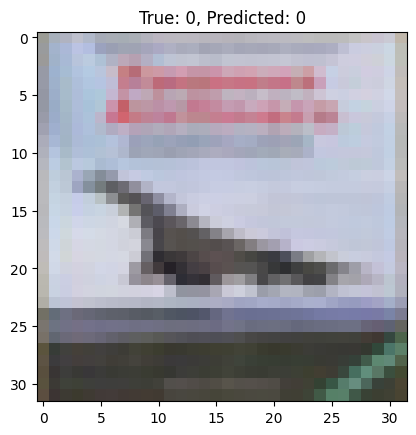

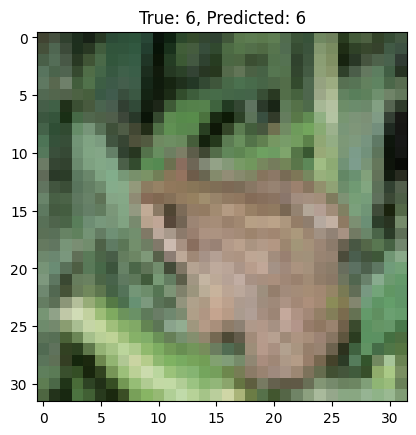

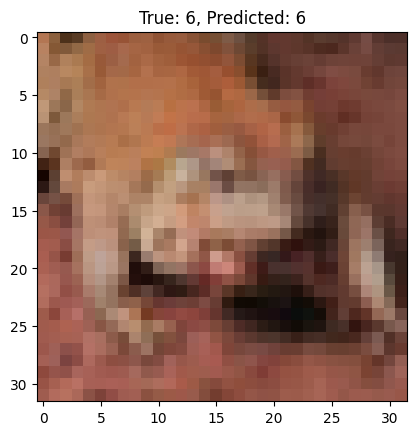

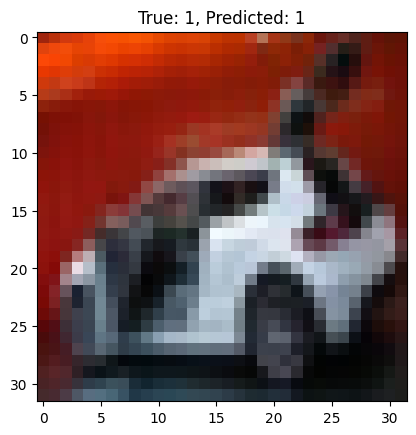

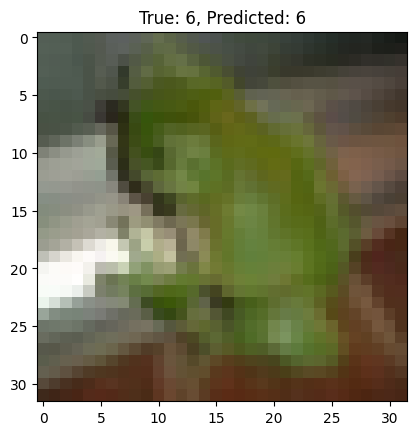

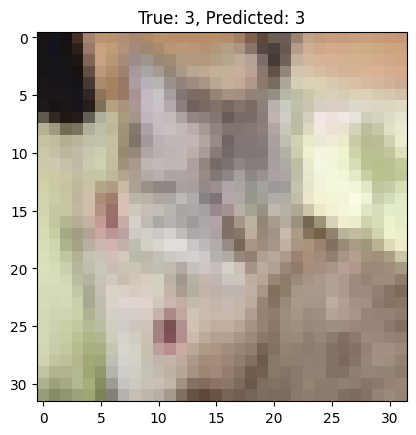

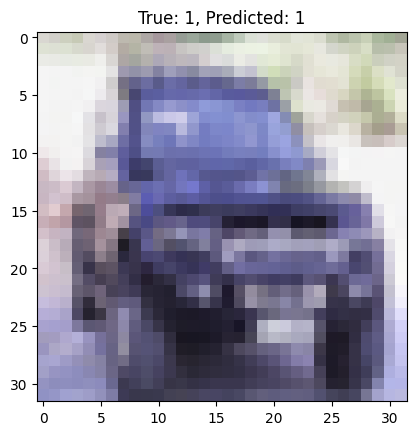

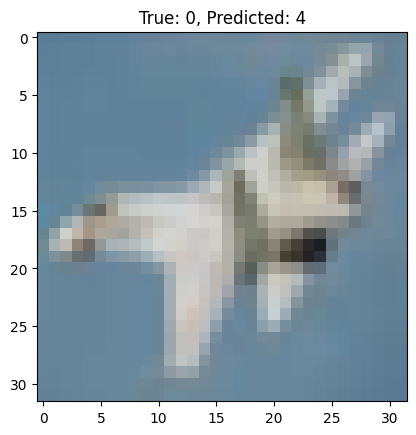

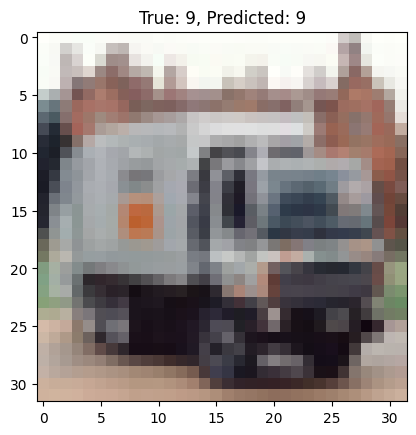

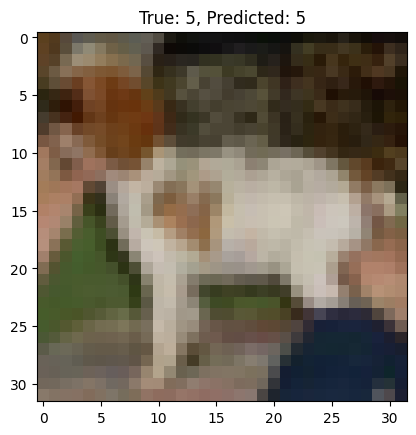

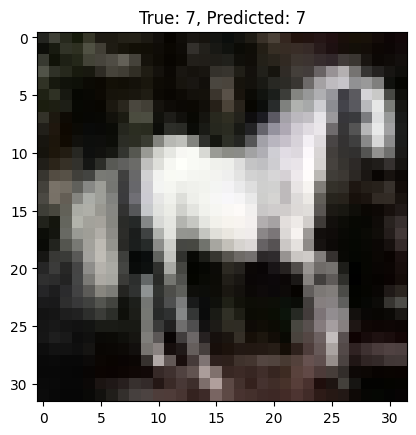

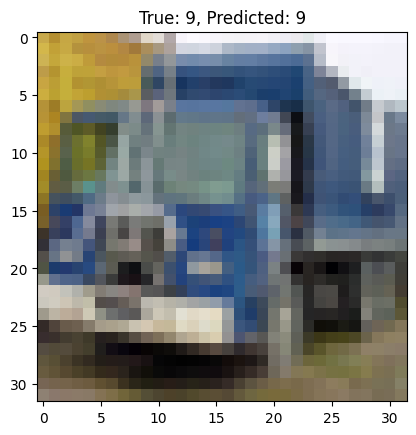

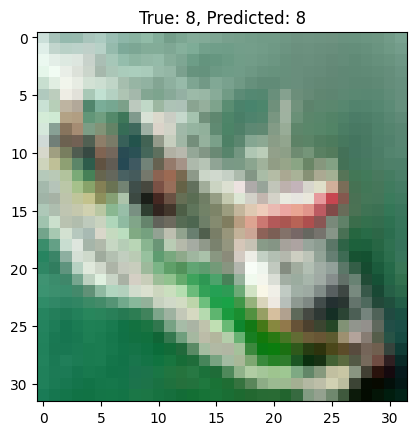

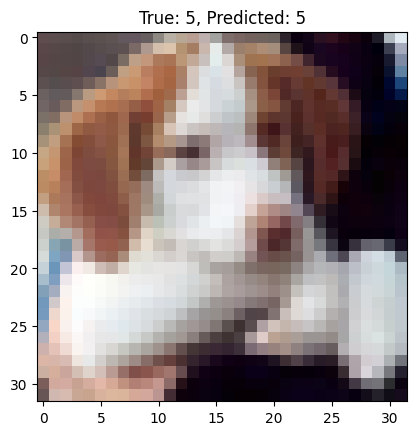

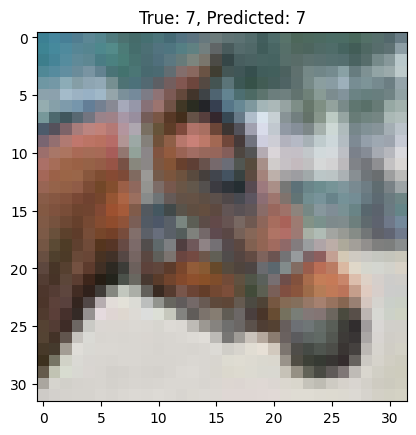

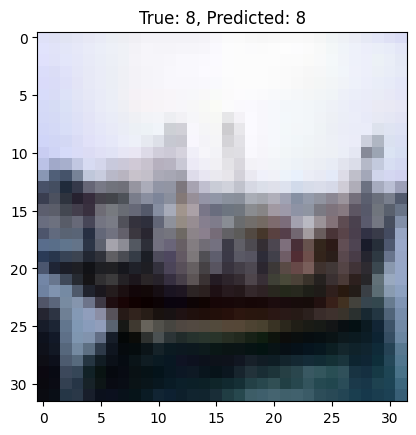

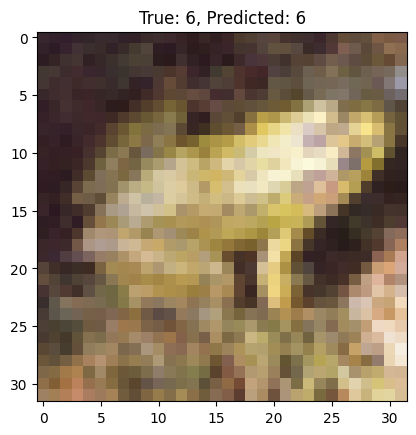

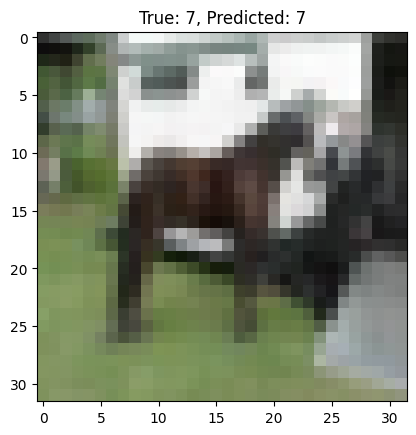

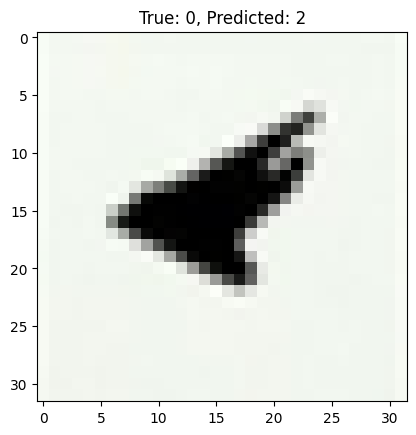

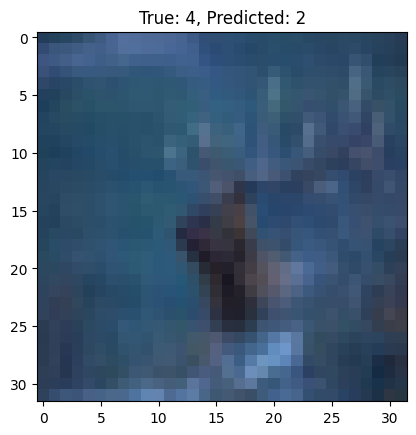

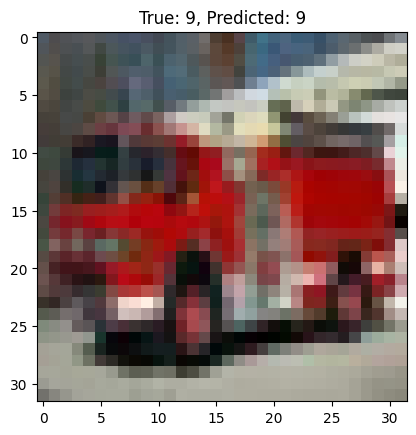

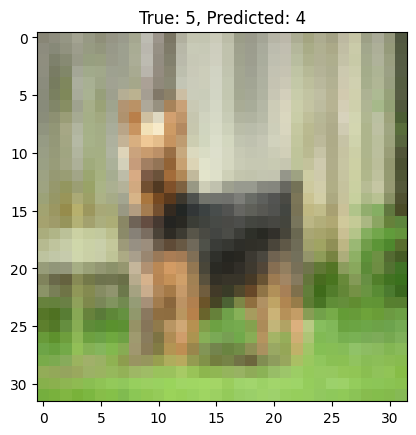

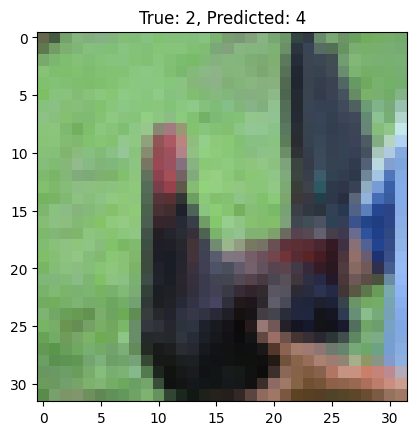

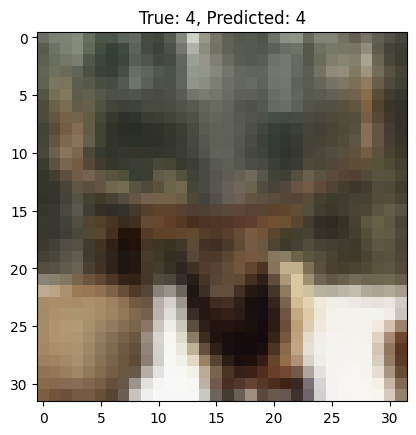

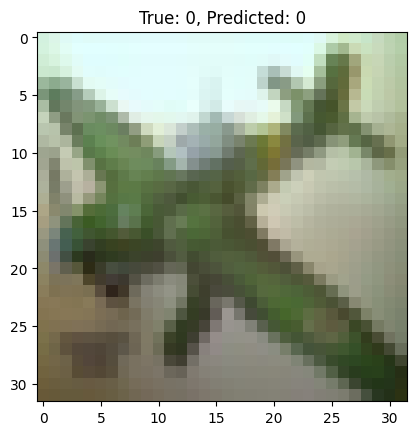

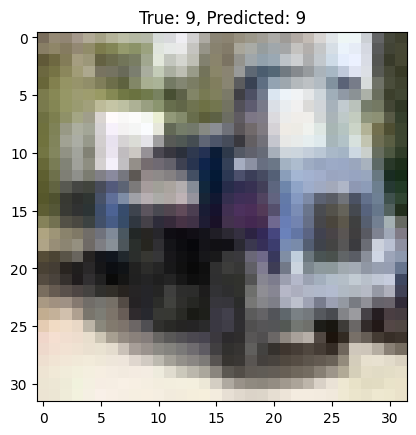

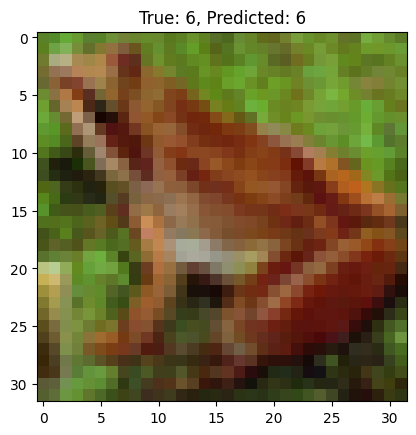

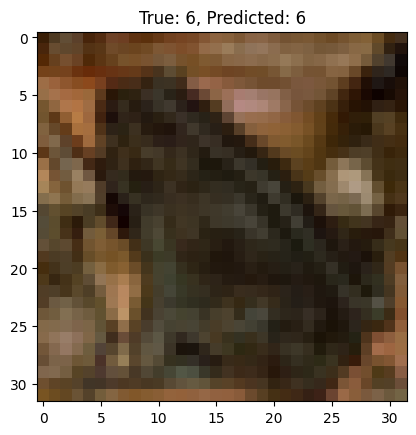

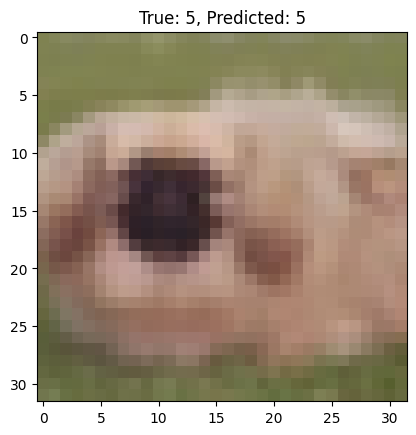

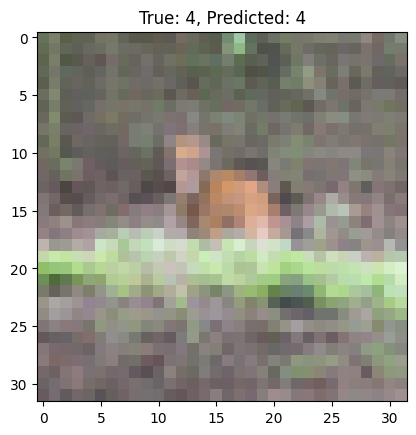

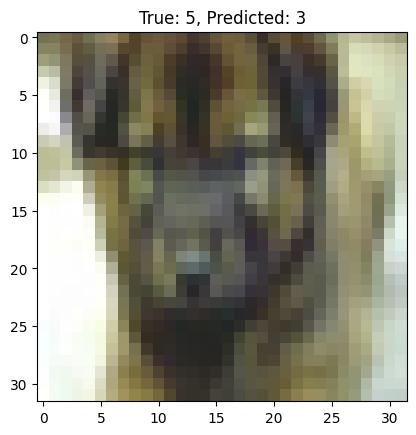

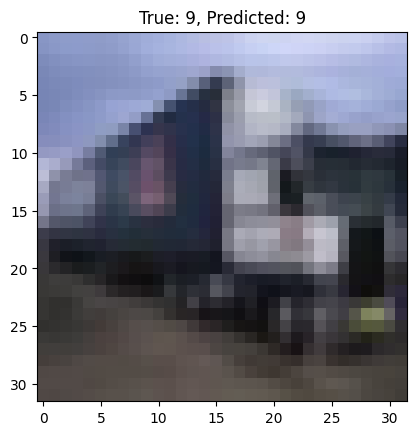

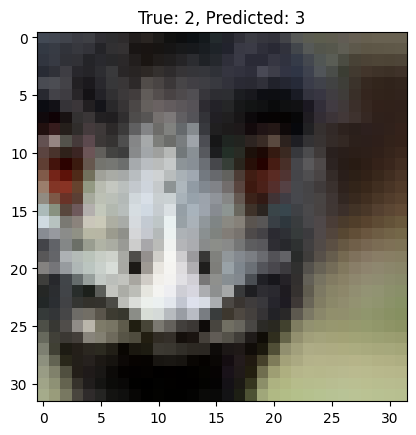

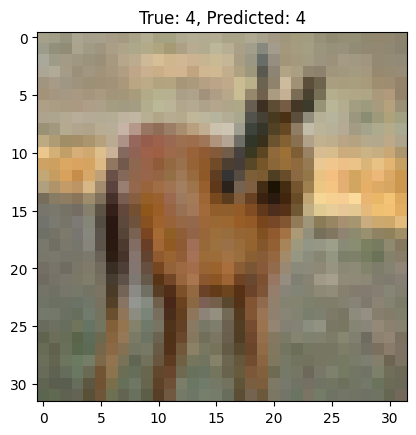

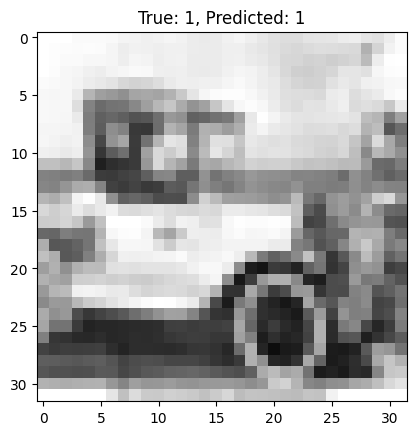

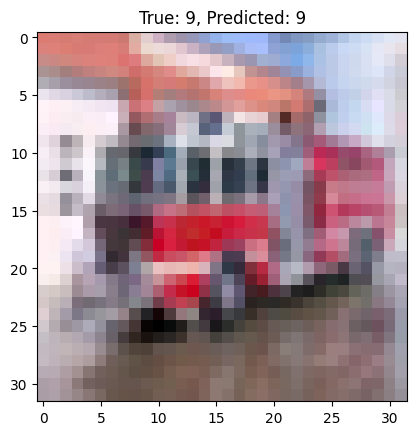

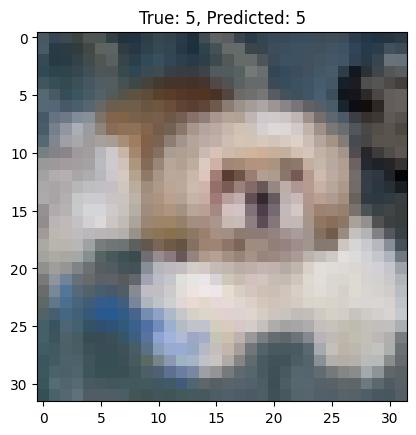

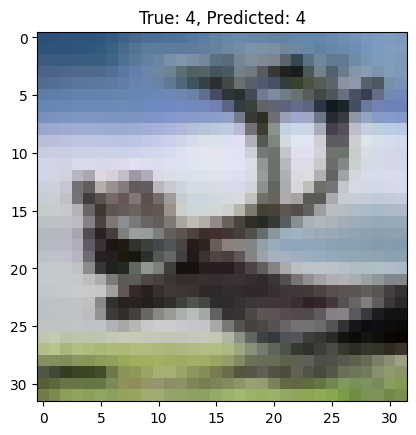

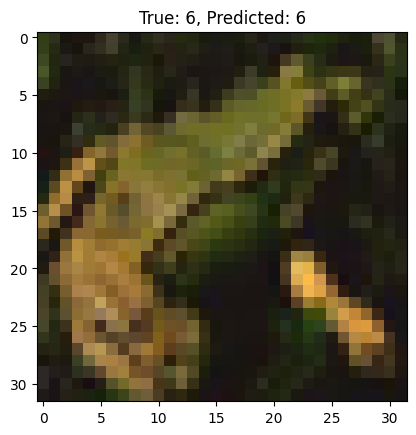

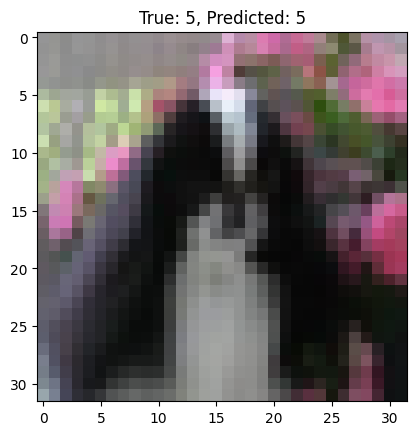

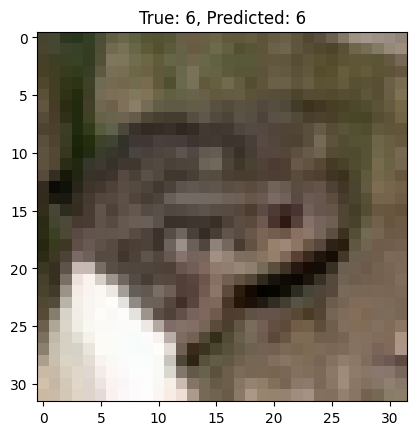

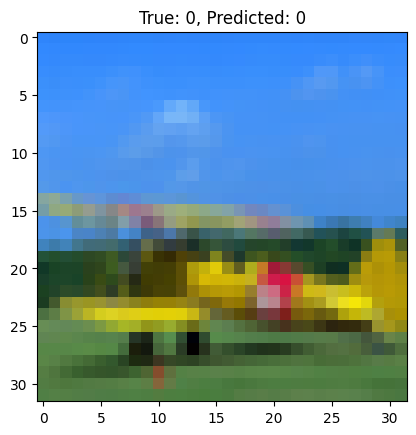

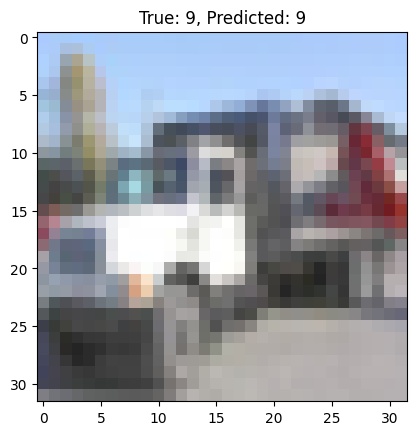

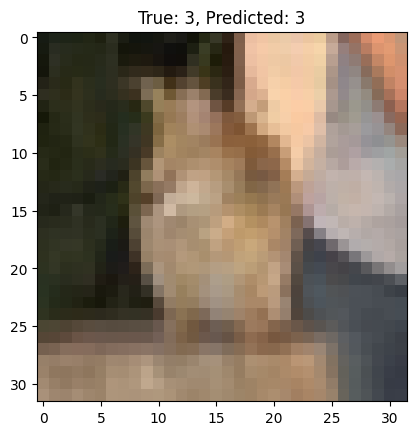

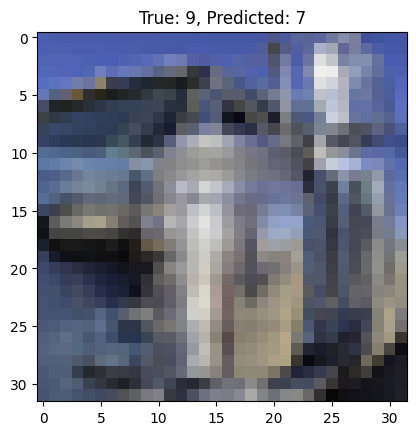

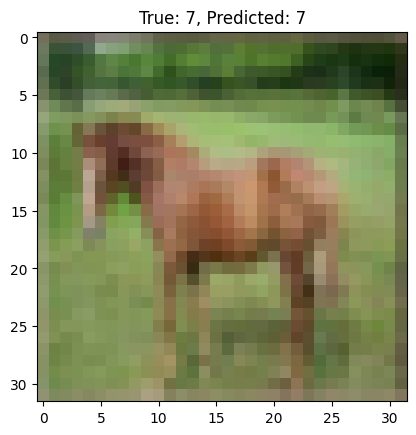

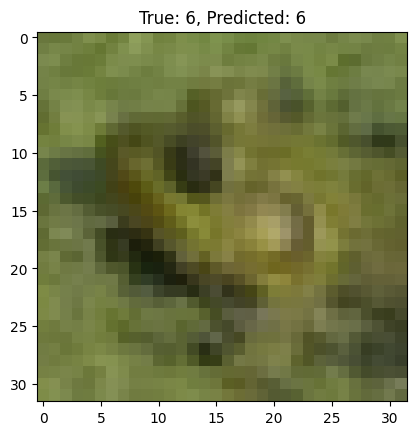

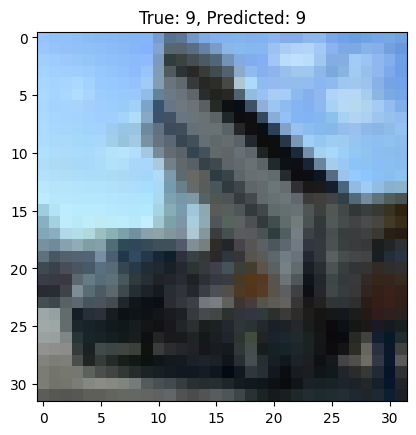

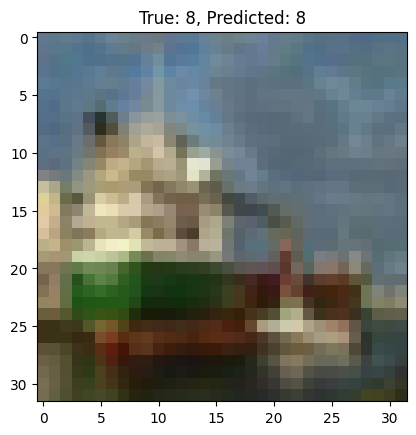

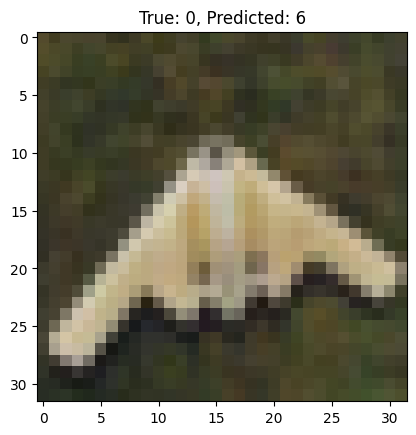

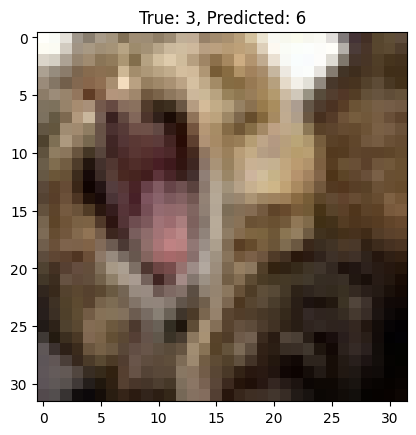

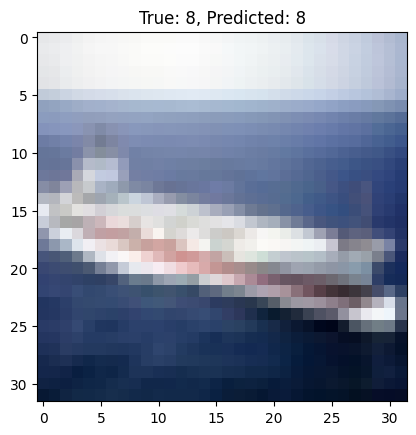

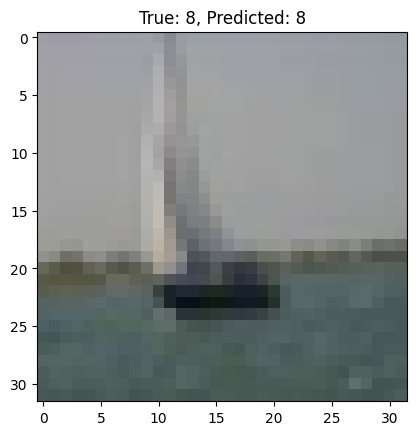

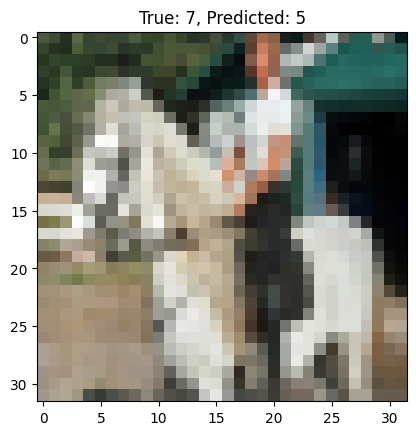

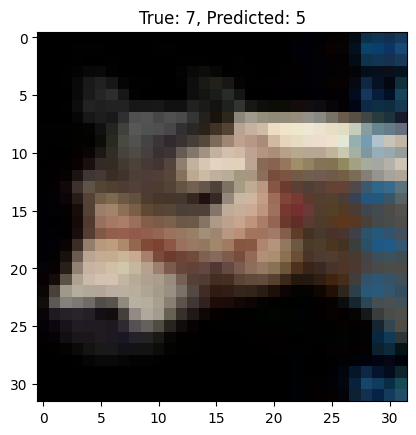

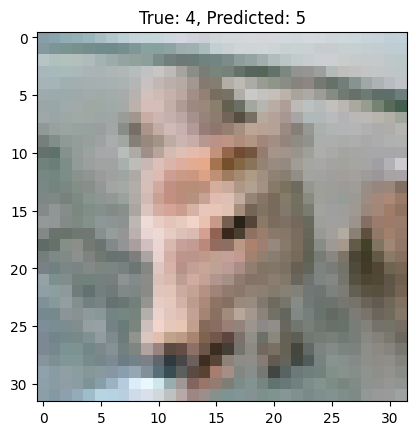

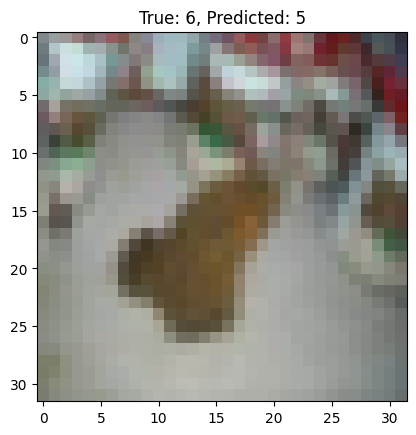

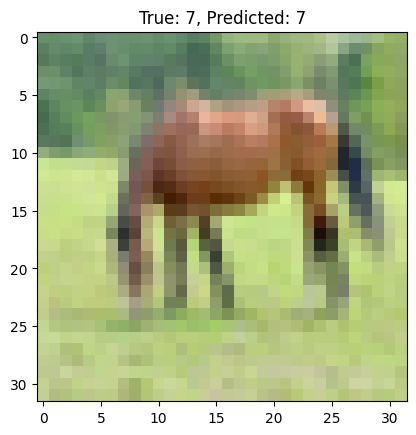

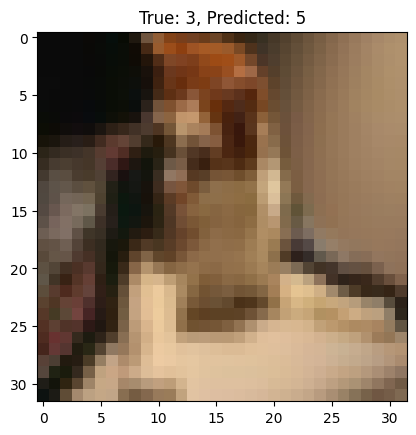

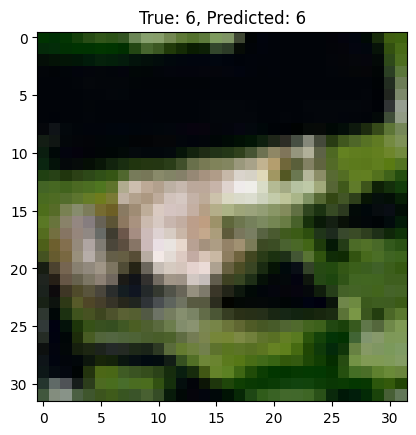

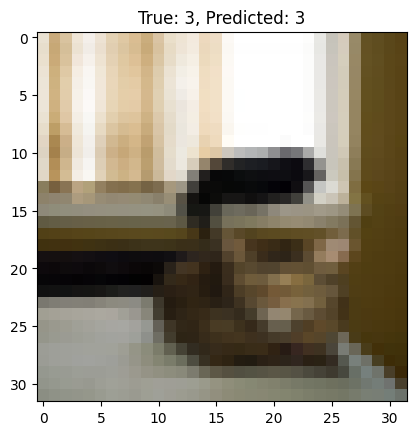

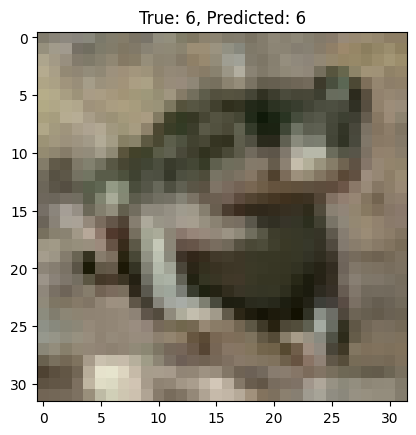

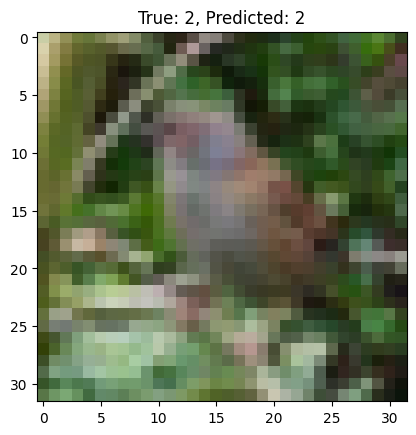

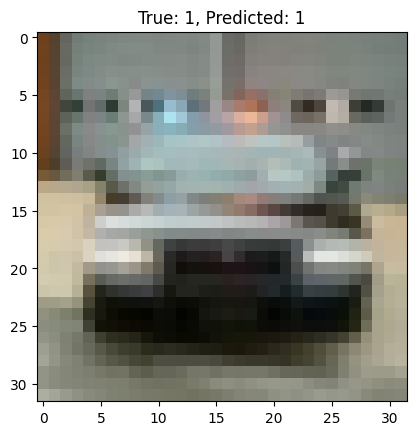

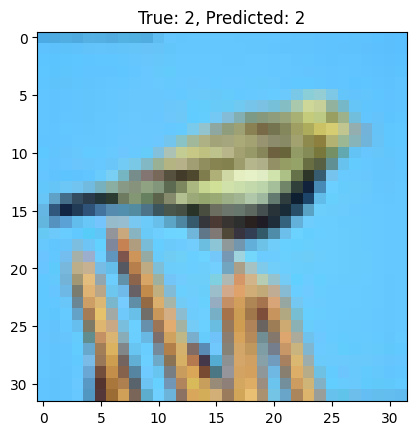

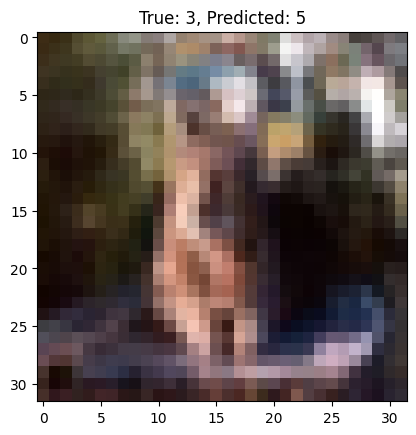

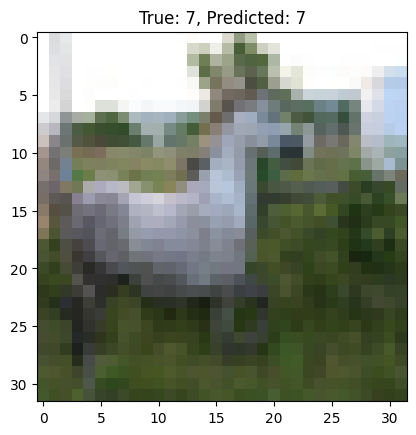

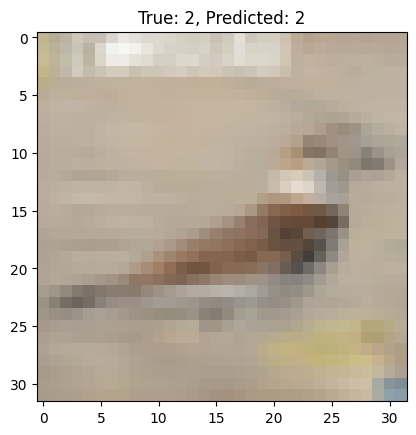

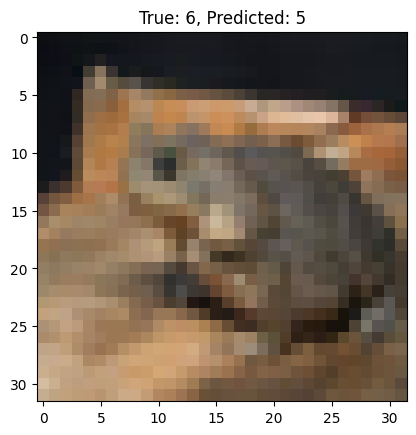

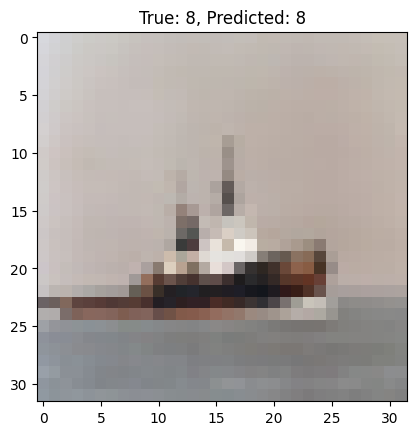

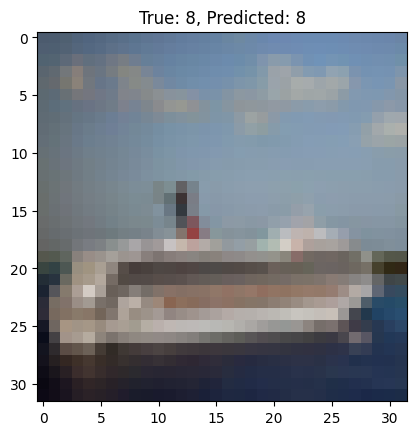

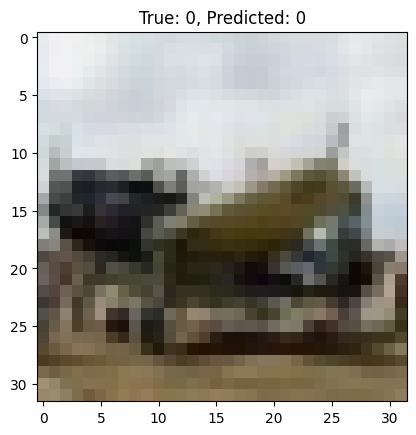

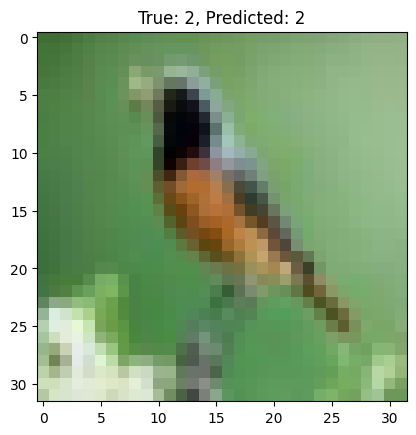

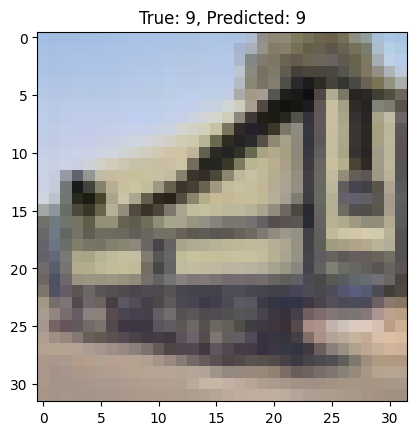

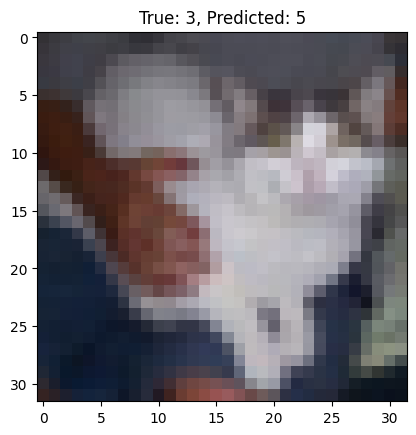

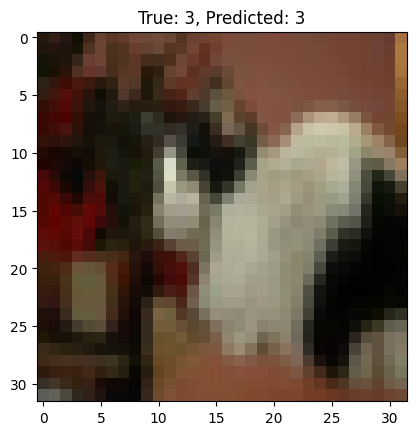

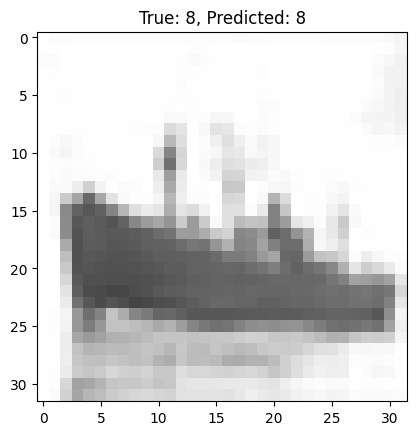

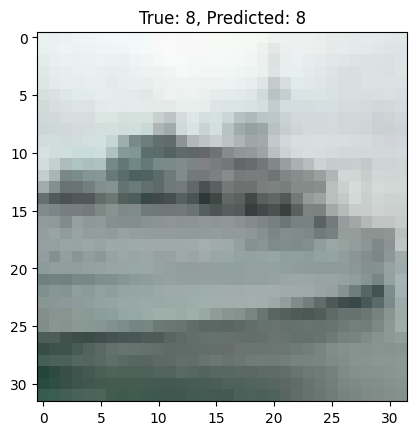

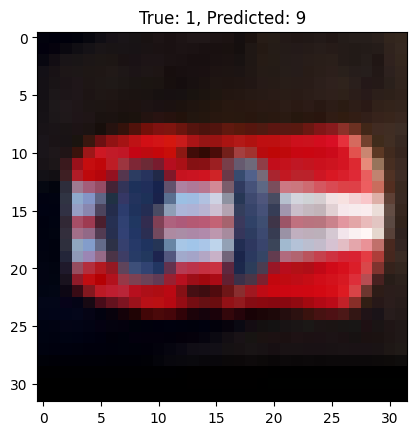

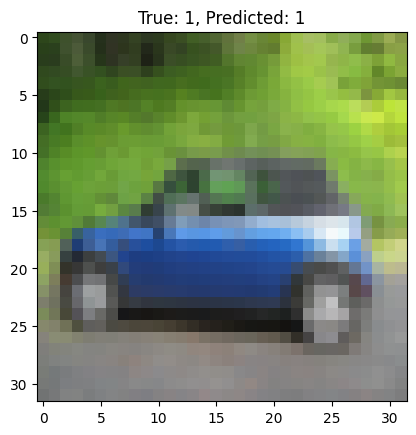

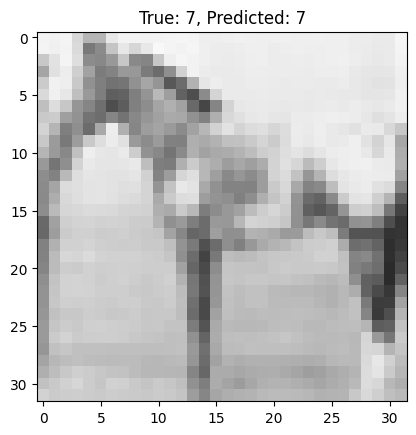

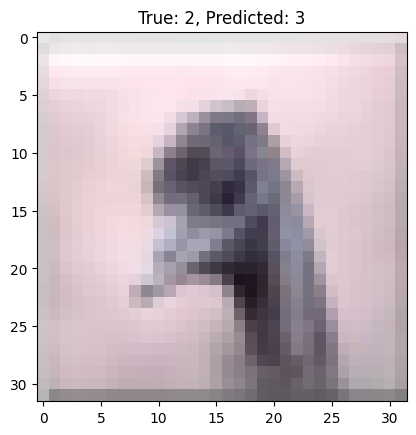

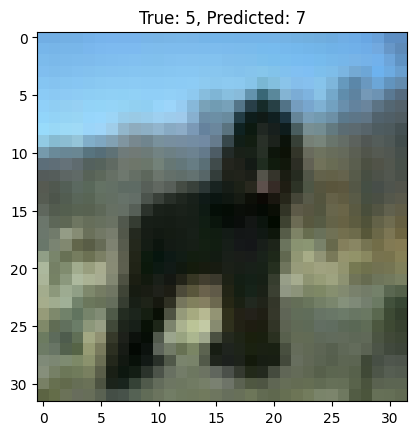

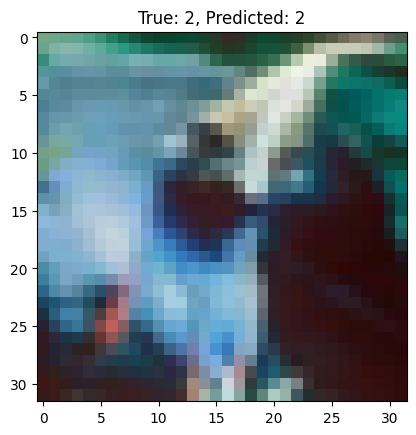

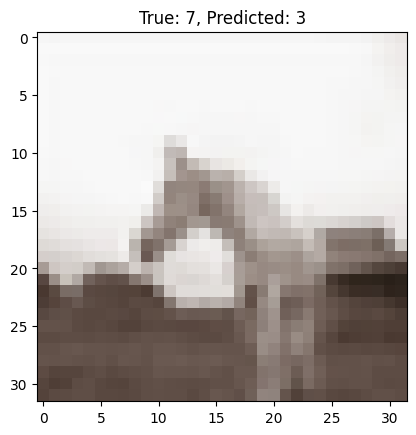

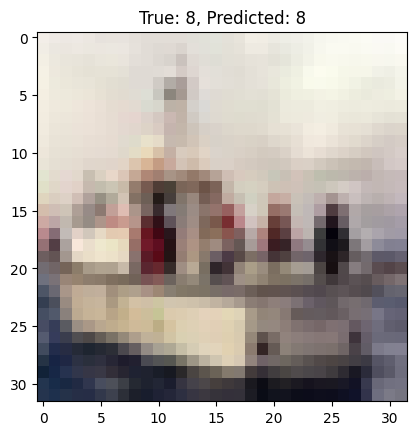

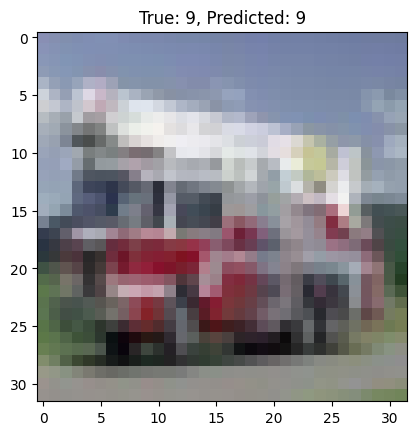

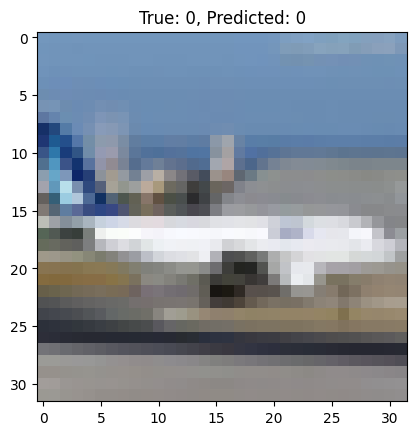

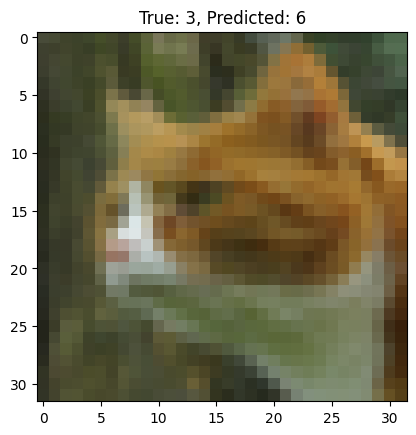

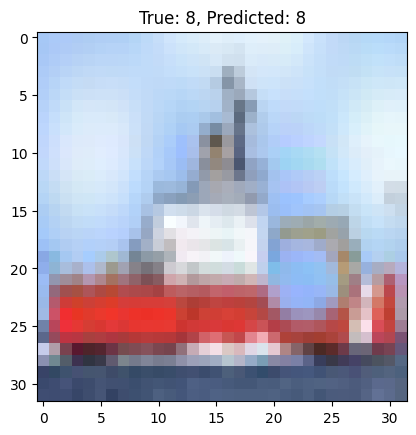

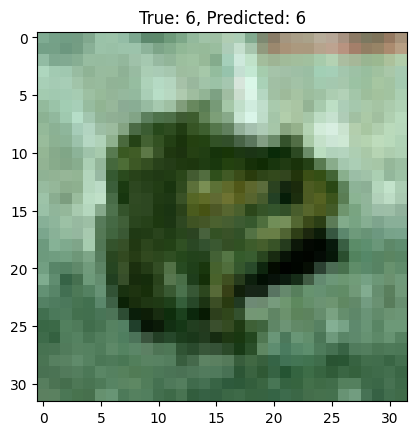

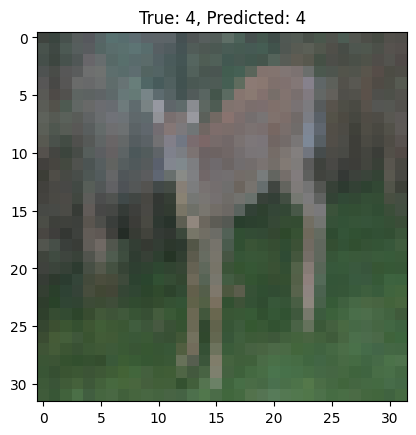

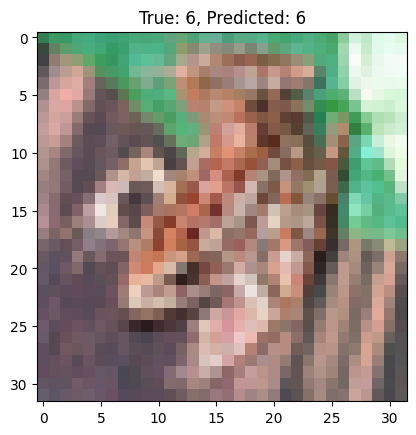

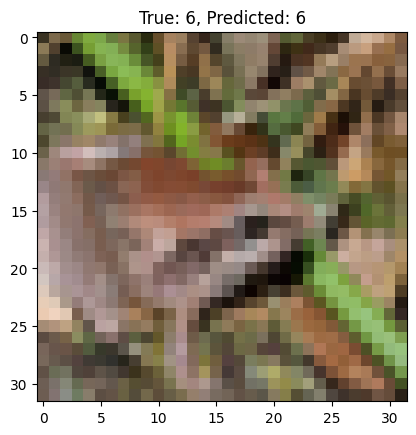

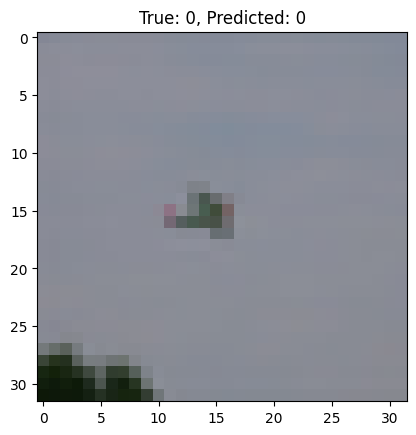

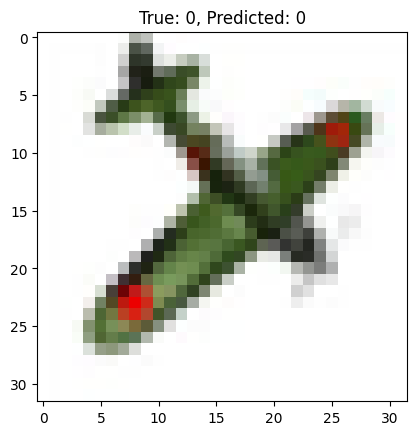

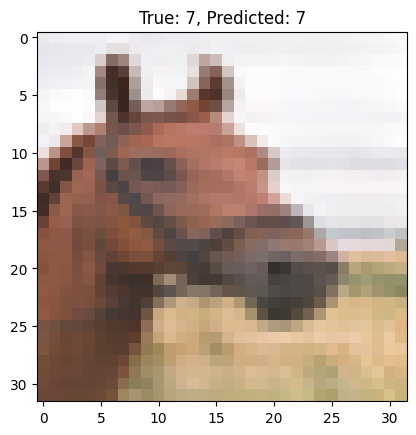

In [ ]:
#----------------------ACCURACY PLOT----------------------------------------------------------

predictions = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_labels.flatten()
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_labels.flatten()


print(classification_report(y_true, y_pred_classes)) #Correction Report

# Show first 5 test images and predictions
for i in range(100):
    plt.imshow(test_images[i])
    plt.title(f"True: {true_classes[i]}, Predicted: {predicted_classes[i]}")
    plt.show()


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.8117 - loss: 0.5408 - val_accuracy: 0.7110 - val_loss: 0.8944
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 47ms/step - accuracy: 0.8247 - loss: 0.4916 - val_accuracy: 0.7098 - val_loss: 0.9026
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 45ms/step - accuracy: 0.8356 - loss: 0.4644 - val_accuracy: 0.7058 - val_loss: 0.9549
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 46ms/step - accuracy: 0.8455 - loss: 0.4358 - val_accuracy: 0.6984 - val_loss: 0.9870
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 45ms/step - accuracy: 0.8532 - loss: 0.4086 - val_accuracy: 0.7068 - val_loss: 0.9881
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.8653 - loss: 0.3748 - val_accuracy: 0.7058 - val_loss: 1.0296
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.8738 - loss: 0.3505 - val_accuracy: 0.6930 - val_loss: 1.0804
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.8862 -

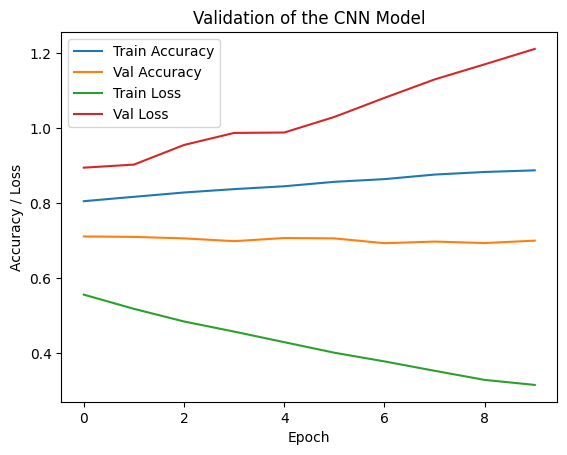

In [ ]:
#------------------------------VALIDATION--------------------------------------------------------------

history = model.fit(train_images, train_labels, epochs=10,validation_data=(test_images, test_labels))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.title('Validation of the CNN Model')
plt.show()


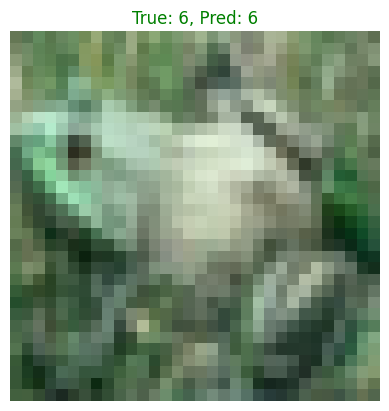

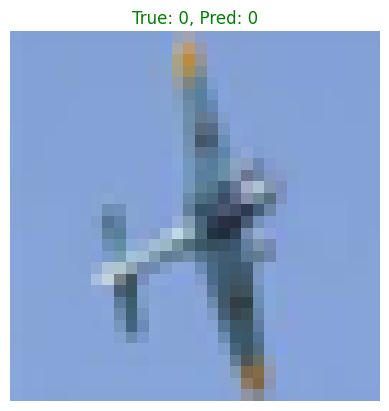

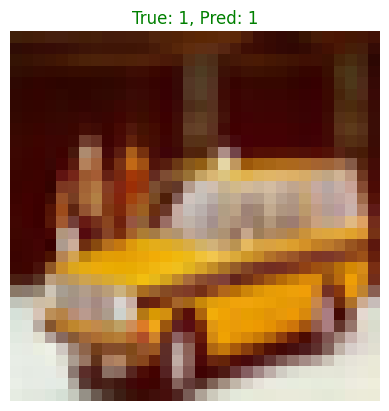

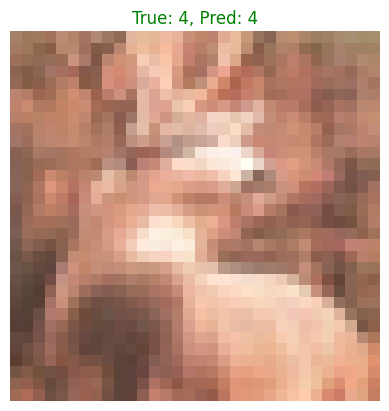

In [ ]:
#--------------------------VALIDATE THE IMAGES------------------------------------------

for i in random.sample(range(len(test_images)), 4):
    plt.imshow(test_images[i])
    plt.title(f"True: {y_true[i]}, Pred: {y_pred_classes[i]}", color='green' if y_true[i]==y_pred_classes[i] else 'red')
    plt.axis('off')
    plt.show()


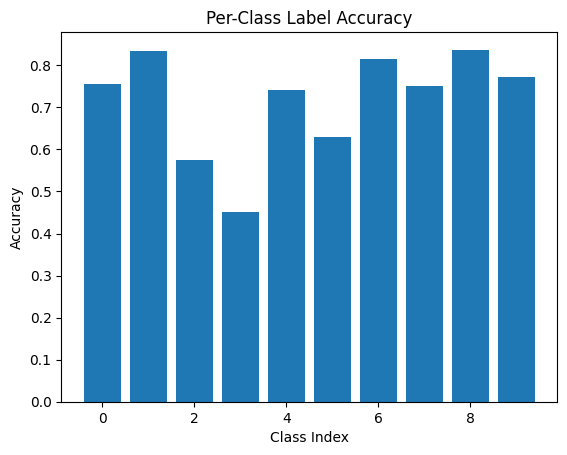

In [ ]:
#--------------------ACCURACY PER CLASS LABEL--------------------------------------------

class_correct = defaultdict(int)
class_total = defaultdict(int)

for true, pred in zip(y_true, y_pred_classes):
    class_total[true] += 1
    if true == pred:
        class_correct[true] += 1

class_accuracy = {k: class_correct[k] / class_total[k] for k in class_total}
plt.bar(class_accuracy.keys(), class_accuracy.values())
plt.xlabel('Class Index')
plt.ylabel('Accuracy')
plt.title('Per-Class Label Accuracy')
plt.show()
